<a href="https://colab.research.google.com/github/BharatXBhalla/Data-Analytics-CDAC/blob/main/Time_Series/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd

In [54]:
df = pd.read_excel('passenger.xlsx',header=None)

In [55]:
df.head()

,0,1
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [56]:
df.columns = ['year','passengers']

In [57]:
df.head()

,year,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [58]:
df.describe()

,passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [59]:
print('Time period start: {}\nTime period end: {}'.format(df.year.min(),df.year.max()))

Time period start: 1949-01
Time period end: 1960-12


In [60]:
df.shape

(144, 2)

In [61]:
df['year']= pd.to_datetime(df["year"],format="%Y-%m")

In [62]:
df.head()

,year,passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [63]:
y= df.set_index("year")

In [64]:
y.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='year', length=144, freq=None)

In [65]:
y.head()

,passengers
year,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [66]:
y.isnull().sum()

passengers    0
dtype: int64

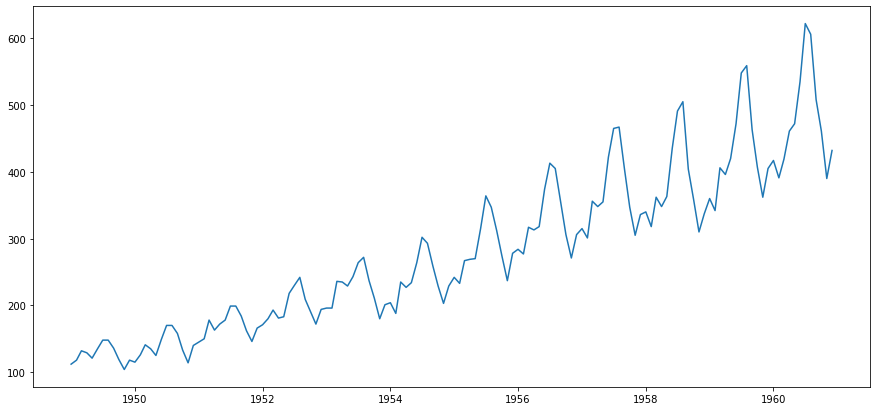

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.plot(y)

In [68]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

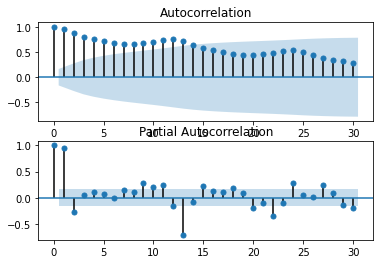

In [69]:
plt.figure()
plt.subplot(2,1,1)
plot_acf(y.passengers,ax=plt.gca(),lags=30)
plt.subplot(2,1,2)
plot_pacf(y.passengers,ax=plt.gca(),lags=30)
plt.show()

In [70]:
from statsmodels.tsa.stattools import adfuller
#H0:IT IS NON STATIONARY
#H1:IT IS  STATIONARY

#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(y.passengers)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)
dftest[4].items()

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


dict_items([('1%', -3.4816817173418295), ('5%', -2.8840418343195267), ('10%', -2.578770059171598)])

In [71]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

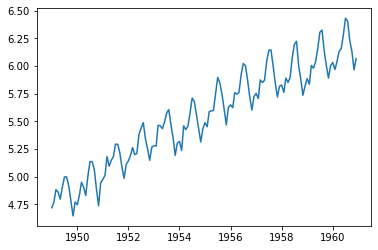

In [72]:
import numpy as np
ts_log = np.log(y)  # USE LOG SCALE
plt.plot(ts_log)

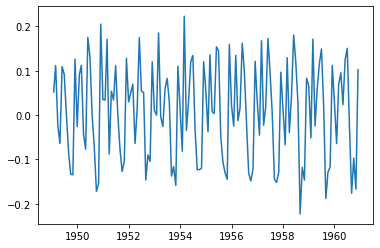

In [73]:
ts_log_diff = ts_log.passengers - ts_log.passengers.shift(1)
plt.plot(ts_log_diff)

In [74]:
ts_log_diff.dropna(inplace=True)

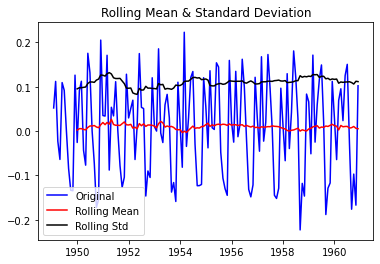

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [75]:
test_stationarity(ts_log_diff)    

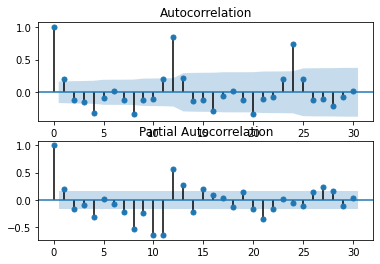

In [76]:
plt.figure()
plt.subplot(211)
plot_acf(ts_log_diff, ax=plt.gca(),lags=30)    # Q=1
plt.subplot(212)
plot_pacf(ts_log_diff, ax=plt.gca(),lags=30)    # P=1     RECOMMENDED
plt.show()


In [77]:
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


plotting ARIMA model


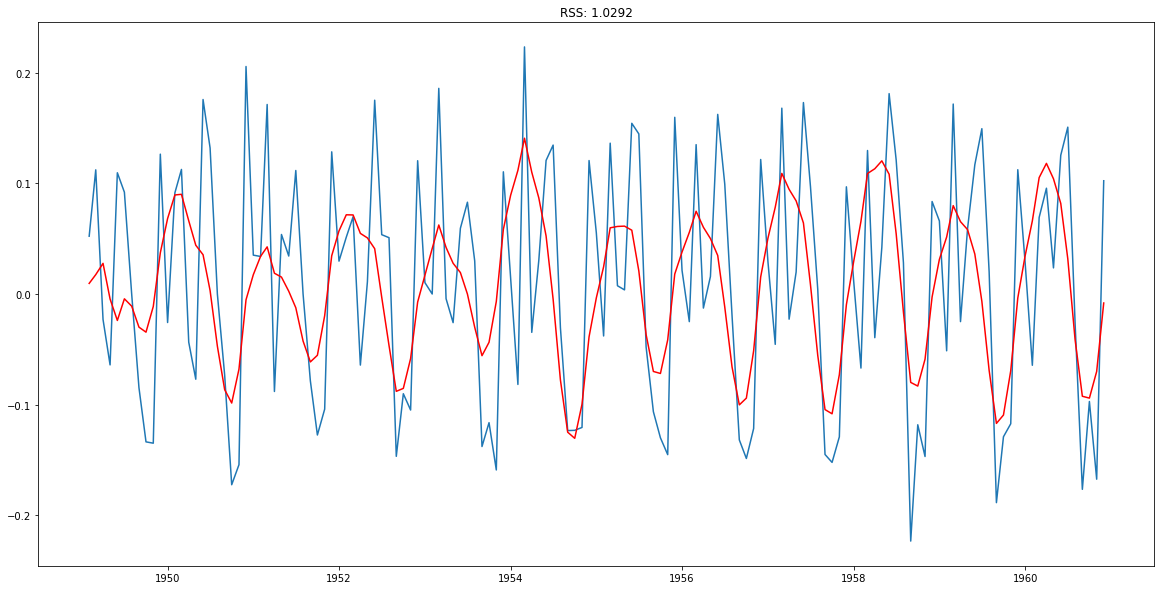

In [78]:
plt.figure(figsize=(20,10))
model=ARIMA(ts_log , order=(2,1,2))  #log transformation
results=model.fit(disp=1)
plt.plot(ts_log_diff)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-ts_log_diff)**2))
print('plotting ARIMA model')

In [79]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

year
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


In [80]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

year
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [81]:
predictions_log=pd.Series(ts_log.passengers.iloc[0], index=ts_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

year
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773240
1949-05-01    4.768720
dtype: float64

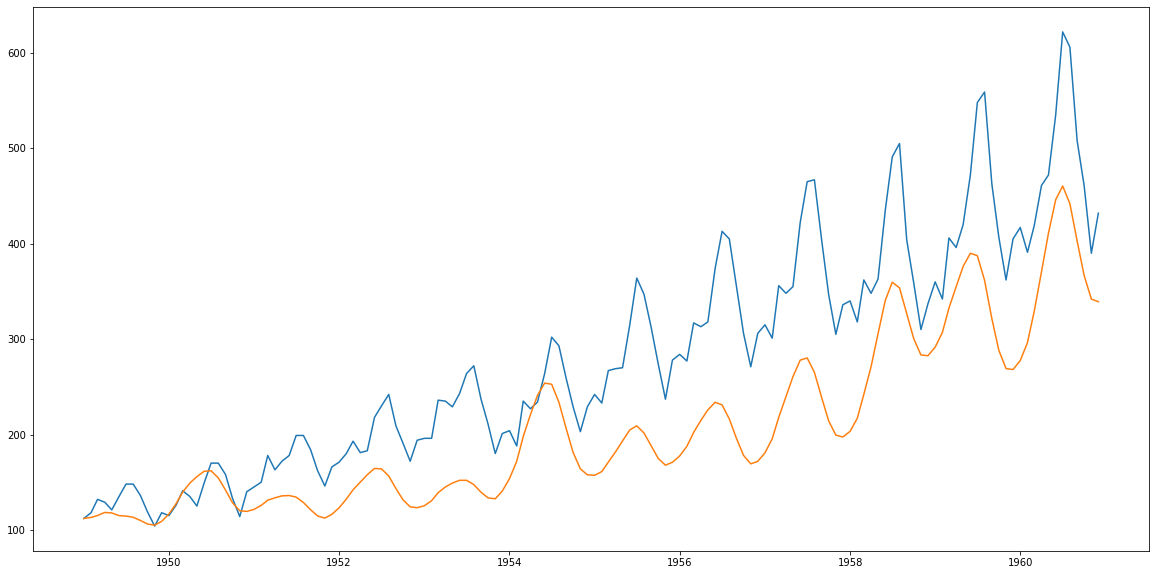

In [82]:
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(y)
plt.plot(predictions_ARIMA)

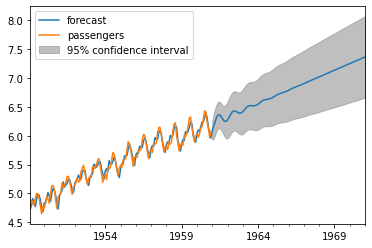

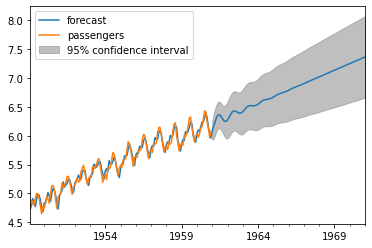

In [83]:
results.plot_predict(1,264) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


plotting AR model


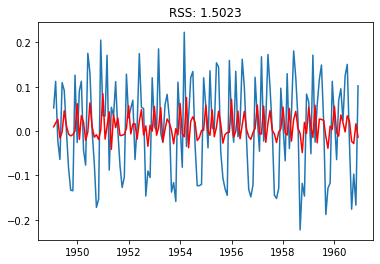

In [84]:
model1=ARIMA(ts_log , order=(2,1,0))#AR MODEL
results1=model1.fit(disp=1)
plt.plot(ts_log_diff)
plt.plot(results1.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results1.fittedvalues-ts_log_diff)**2))
print('plotting AR model')

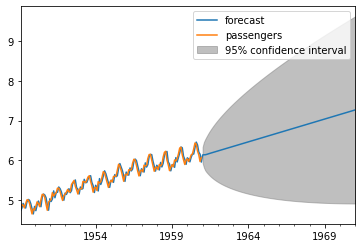

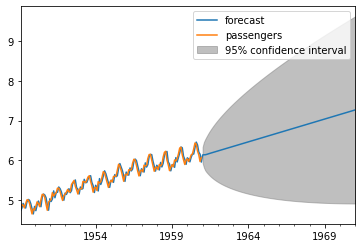

In [85]:
results1.plot_predict(1,264)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


plotting ma model


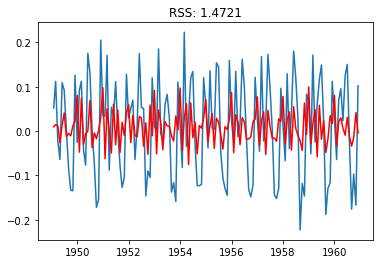

In [86]:
model1=ARIMA(ts_log , order=(0,1,2))#MA MODEL
results1=model1.fit(disp=1)
plt.plot(ts_log_diff)
plt.plot(results1.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results1.fittedvalues-ts_log_diff)**2))
print('plotting ma model')

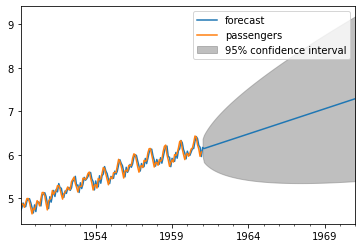

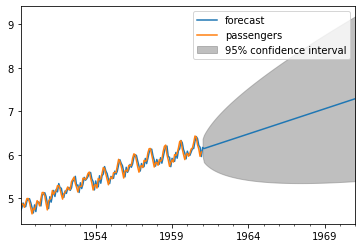

In [87]:
results1.plot_predict(1,264)